# this code is the final version of PyTorch NNs

# Libraries

In [1]:
# load libaries
import pandas as pd                  # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization

# a magic function that renders the figure in a notebook 
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

# Import Data

In [2]:
# Import data
df = pd.read_csv('df19_20.csv')
df.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,1
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,0


# Import Sklearn Packages

In [3]:
from sklearn.model_selection import train_test_split   # even though this is usually used for train-test split, I am using it to sample the data for now to have stratified sampling
from sklearn.preprocessing import MinMaxScaler         # to normalize data

# Split Data

In [4]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['ENROLID', 'LABEL'], axis = 1)
y = df['LABEL']

In [5]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Text(0.5, 1.0, 'Class Distribution')

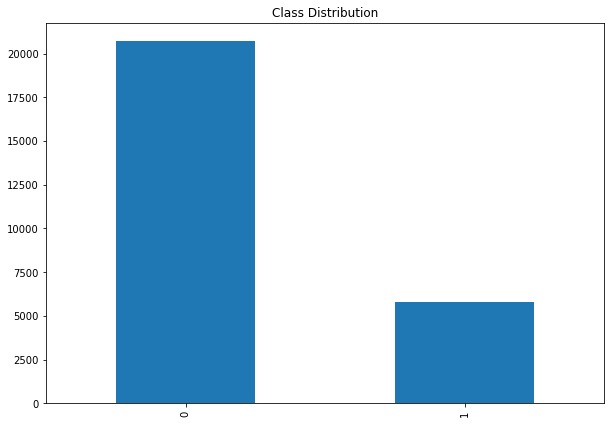

In [6]:
# label frequency
plt.figure(figsize=(10, 7))
ax = y_train.value_counts().plot.bar()
ax.set_title('Class Distribution')

In [60]:
y_train.value_counts()

0    20717
1     5813
Name: LABEL, dtype: int64

## Normalize data

In [7]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Import SMOTE

In [8]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [9]:
# install first if using it first-time
# import sys
# !{sys.executable} -m pip install imblearn

In [10]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE

# SMOTE to oversample the data

In [11]:
sm = SMOTE(random_state = 1, sampling_strategy='auto', k_neighbors=10)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

In [12]:
X_train_sm

array([[0.859375  , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.59375   , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03125   , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79166964, 1.        , 0.        , ..., 0.        , 0.08333333,
        0.        ],
       [0.73417135, 0.        , 0.        , ..., 0.        , 0.01055244,
        0.        ],
       [0.9376154 , 0.        , 0.        , ..., 0.        , 0.08333333,
        0.        ]])

In [13]:
y_train_sm

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

([<matplotlib.axis.XTick at 0x287ae6e2ca0>,
 [Text(0, 0, ''), Text(0, 0, '')])

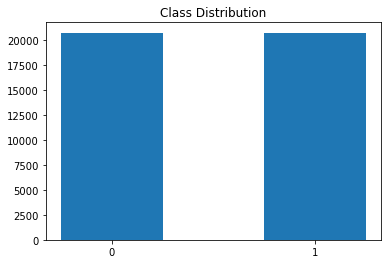

In [14]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

# PyTorch Neural Network

https://www.learnpytorch.io/02_pytorch_classification/#1-make-classification-data-and-get-it-ready

In [20]:
# install PyTorch first if using it first-time
# uncomment below to install -- or may be better to install on the terminal
# import sys
# !{sys.executable} -m pip uninstall torch --yes

In [ ]:
# !{sys.executable} -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --yes

In [23]:
# import PyTorch
import torch
from torch import nn

In [24]:
# convert np.arrays to tensors

# training data
X_train_sm = torch.from_numpy(X_train_sm).type(torch.float)
y_train_sm = torch.from_numpy(y_train_sm).type(torch.float)

# testing data
X_test = torch.from_numpy(X_test).type(torch.float)
# since y_test is still a pd.series, need to convert to np.array
y_test = torch.from_numpy(y_test.to_numpy()).type(torch.float)

In [25]:
X_train_sm.shape

torch.Size([41434, 23])

In [26]:
X_train_sm

tensor([[0.8594, 1.0000, 0.0000,  ..., 0.0000, 0.1250, 0.0000],
        [0.5938, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0312, 0.0000, 0.1111,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.7917, 1.0000, 0.0000,  ..., 0.0000, 0.0833, 0.0000],
        [0.7342, 0.0000, 0.0000,  ..., 0.0000, 0.0106, 0.0000],
        [0.9376, 0.0000, 0.0000,  ..., 0.0000, 0.0833, 0.0000]])

In [27]:
y_train_sm

tensor([1., 0., 0.,  ..., 1., 1., 1.])

In [28]:
# setting up device agnostic code (so our model can run on CPU or GPU if it's available)
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:
# Check for GPU
torch.cuda.is_available()

True

In [30]:
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [31]:
!nvidia-smi

Thu Apr 20 18:17:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P2    25W /  80W |    510MiB /  6144MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# hyperparameter tuning
https://machinelearningmastery.com/how-to-grid-search-hyperparameters-for-pytorch-models/

In [32]:
import sys
!{sys.executable} -m pip install skorch

In [ ]:
X_train_sm.squeeze().shape

torch.Size([41434, 23])

In [ ]:
y_train_sm.unsqueeze(1).shape

torch.Size([41434, 1])

In [33]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

#### computation time for below gridsearch: 6166 sec
'batch_size': [10, 20, 50, 100],
    'max_epochs': [100, 500, 1000]

In [ ]:
# PyTorch classifier  
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(23, 100)
        self.act = nn.ReLU()
        self.output = nn.Linear(100, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adam,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 50, 100],
    'max_epochs': [100, 500, 1000]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_sm, y_train_sm.unsqueeze(1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.601077 using {'batch_size': 100, 'max_epochs': 1000}
0.500893 (0.000515) with: {'batch_size': 10, 'max_epochs': 100}
0.502317 (0.002066) with: {'batch_size': 10, 'max_epochs': 500}
0.503331 (0.002138) with: {'batch_size': 10, 'max_epochs': 1000}
0.500362 (0.000452) with: {'batch_size': 20, 'max_epochs': 100}
0.502100 (0.001224) with: {'batch_size': 20, 'max_epochs': 500}
0.503548 (0.001693) with: {'batch_size': 20, 'max_epochs': 1000}
0.502076 (0.001143) with: {'batch_size': 50, 'max_epochs': 100}
0.509533 (0.004289) with: {'batch_size': 50, 'max_epochs': 500}
0.509582 (0.005209) with: {'batch_size': 50, 'max_epochs': 1000}
0.592581 (0.042323) with: {'batch_size': 100, 'max_epochs': 100}
0.586452 (0.067047) with: {'batch_size': 100, 'max_epochs': 500}
0.601077 (0.052402) with: {'batch_size': 100, 'max_epochs': 1000}


In [ ]:
# computation time: 6166 sec

#### computation time for below gridsearch: 23410 sec
'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],

In [ ]:
# tune optimizer
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(23, 100)
        self.act = nn.ReLU()
        self.output = nn.Linear(100, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    max_epochs=1000,
    batch_size=100,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_sm, y_train_sm.unsqueeze(1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709683 using {'optimizer': <class 'torch.optim.adagrad.Adagrad'>}
0.504706 (0.002230) with: {'optimizer': <class 'torch.optim.sgd.SGD'>}
0.506565 (0.003953) with: {'optimizer': <class 'torch.optim.rmsprop.RMSprop'>}
0.709683 (0.005781) with: {'optimizer': <class 'torch.optim.adagrad.Adagrad'>}
0.707366 (0.004902) with: {'optimizer': <class 'torch.optim.adadelta.Adadelta'>}
0.589107 (0.064675) with: {'optimizer': <class 'torch.optim.adam.Adam'>}
0.539774 (0.015812) with: {'optimizer': <class 'torch.optim.adamax.Adamax'>}
0.614544 (0.043026) with: {'optimizer': <class 'torch.optim.nadam.NAdam'>}


In [ ]:
# 23410 sec

#### computation time for below gridsearch: 6033 sec
'optimizer__lr': [0.01, 0.1, 0.5]

In [29]:
# Tune learning rate 6033 sec
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(23, 100)
        self.act = nn.ReLU()
        self.output = nn.Linear(100, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adagrad,
    max_epochs=1000,
    batch_size=100,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'optimizer__lr': [0.01, 0.1, 0.5],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_sm, y_train_sm.unsqueeze(1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709562 using {'optimizer__lr': 0.01}
0.709562 (0.005343) with: {'optimizer__lr': 0.01}
0.626973 (0.026114) with: {'optimizer__lr': 0.1}
0.541294 (0.018587) with: {'optimizer__lr': 0.5}


In [29]:
# Tune learning rate -- 6033 sec
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(23, 100)
        self.act = nn.ReLU()
        self.output = nn.Linear(100, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adagrad,
    max_epochs=1000,
    batch_size=100,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'optimizer__lr': [0.01, 0.1, 0.5],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_sm, y_train_sm.unsqueeze(1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709562 using {'optimizer__lr': 0.01}
0.709562 (0.005343) with: {'optimizer__lr': 0.01}
0.626973 (0.026114) with: {'optimizer__lr': 0.1}
0.541294 (0.018587) with: {'optimizer__lr': 0.5}


In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# tune number of neurons in the hidden layer -- 4563 sec
class PimaClassifier(nn.Module):
    def __init__(self, n_neurons=50):
        super().__init__()
        self.layer = nn.Linear(23, n_neurons)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.output = nn.Linear(n_neurons, 1)
        self.prob = nn.Sigmoid()
        self.weight_constraint = 2.0
        # manually init weights
        init.kaiming_uniform_(self.layer.weight)
        init.kaiming_uniform_(self.output.weight)

    def forward(self, x):
        # maxnorm weight before actual forward pass
        with torch.no_grad():
            norm = self.layer.weight.norm(2, dim=0, keepdim=True).clamp(min=self.weight_constraint / 2)
            desired = torch.clamp(norm, max=self.weight_constraint)
            self.layer.weight *= (desired / norm)
        # actual forward pass
        x = self.act(self.layer(x))
        x = self.dropout(x)
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adagrad,
    max_epochs=1000,
    batch_size=100,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'module__n_neurons': [20, 100, 500]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_sm, y_train_sm.unsqueeze(1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709321 using {'module__n_neurons': 500}
0.708235 (0.006461) with: {'module__n_neurons': 20}
0.709273 (0.006934) with: {'module__n_neurons': 100}
0.709321 (0.005270) with: {'module__n_neurons': 500}


In [49]:
NN_pred_proba = grid_result.predict_proba(X_test)[:, 1]

#### Best model
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adagrad,
    max_epochs=1000,
    batch_size=100,
    verbose=False
)

+

using {'module__n_neurons': 500}

In [39]:
# saving the model
NN_clf = grid_result
import pickle
filename = 'NNs_model.sav'
pickle.dump(NN_clf, open(filename, 'wb'))

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

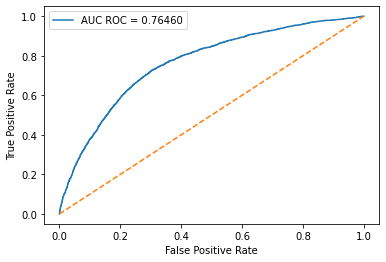

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, NN_pred_proba)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, NN_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'NNs')

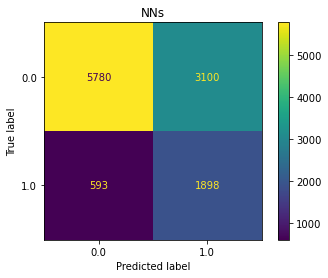

In [54]:
plt.figsize = (20, 14)
plot_confusion_matrix(NN_clf, X_test, y_test)
plt.title("NNs")

In [55]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, NN_pred_proba)

In [56]:
# AUPRC
auprc = auc(recall, precision)

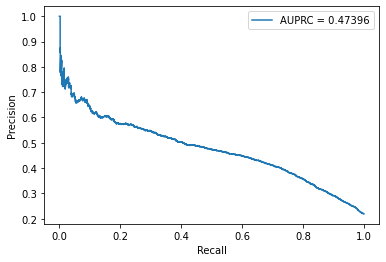

In [57]:
# Plot the PRC
plt.plot(recall, precision, label=f'AUPRC = {auprc:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [58]:
# another way to account for when denominator is zero
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds[np.argmax(f1_scores)]

In [59]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.61284286
Best F1-Score:  0.51973265436028
